## **MEMBER LIST**
- นาย สรวิศ ยินดีอนันต์ รหัสนักศึกษา 62070277
- นาย อภิพล ด้วงเพียร รหัสนักศึกษา 62070285

In [ ]:
!pip install pandas==1.3.4

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import requests
import bs4
from pprint import pprint
import pandas as pd
import numpy as np
import re
import math

## **DATA ACQUISITION**

$\color{red}{\text{!!!}}$ **อย่ารันนะครับ เพราะใช้เวลา 13 ชั่วโมง**

- Extract all atributes from the car details single page
- Make the function which capable for automatically collect data from the page
- Find out how to loop through the brand page
- loop through brand and collect all the used-car data in each brand

-----------

- ชื่อ ( TITLE ) 
- ยี่ห้อ ( MANUFACTURER ) <span style="color:red">***</span>
- ราคา ( PRICE )
- ปีที่ผลิต ( MANUFACTURE YEAR ) 
- รายละเอียด ( DESCRIPTION ) <span style="color:red">***</span>
- สีรถ ( COLOR )
- ประเภทเกียร์ ( TRANSMISSION )
- ไมล์ ( MILEAGE )
- วันที่ลงขาย ( POST DATE )
- สภาพ ( CONDITION )
- ประเภทเชื้อเพลิง ( FUEL TYPE )
- จำนวนเกียร์ ( NUMBER OF GEARS )
- จำนวนประตู ( DOORS )
- จำนวนที่นั่ง ( SEAT CAPACITY )
- ความจุกระบอกสูบ ( ENGINE CC )
- แรงม้า ( HORSEPOWER )
- แรงบิด ( TORQUE )
- อัตราการใช้น้ำมัน ( FUEL COMSUMPTION )
- อัตราการปล่อย CO2 ( CO2 EMISSION )
- เวลาที่ใช้ในการเร่งจาก 0–100 km / hr (SECONDS) ( ACCELERATE TIME )
- ยาว (mm) ( LENGTH )
- กว้าง (mm) ( LENGTH )
- สูง (mm) ( HEIGHT )
- ความจุถังน้ำมัน (LITRES) ( FUEL TANK )

In [ ]:
# Title
def get_title(html_page):
    selector = "h1.listing__title"
    tags = html_page.select_one(selector)
    return tags.text

In [ ]:
# Price
def get_price(html_page):
    tag = html_page.find(text = re.compile("Baht"), class_ = "listing__price")
    if tag:
        return int(tag.text.replace(",", "").replace(" ", "").replace("Baht", ""))
    else:
        return np.nan

In [ ]:
# Manufacture Year
def get_year(html_page):
    selector = "div.c-key-details > div.c-carousel > div.c-key-details__item > div.c-card > div.c-card__body > span.u-text-bold"
    tags = html_page.select(selector)
    return tags[1].text

In [ ]:
# Transmission
def get_transmission(html_page):
    selector = "div.c-key-details > div.c-carousel > div.c-key-details__item > div.c-card > div.c-card__body > span.u-text-bold"
    tags = html_page.select(selector)
    return tags[5].text

In [ ]:
# Color
def get_color(html_page):
    selector = "div.c-key-details > div.c-carousel > div.c-key-details__item > div.c-card > div.c-card__body > span.u-text-bold"
    tags = html_page.select(selector)
    return tags[3].text

In [ ]:
# Mileage
def get_mileage(html_page):
    selector = "div.c-key-details > div.c-carousel > div.c-key-details__item > div.c-card > div.c-card__body > span.u-text-bold"
    tags = html_page.select(selector)
    return tags[2].text.replace("K", "").replace("km", "").replace(" ", "")

In [ ]:
# Seat_Capacity
def get_seatcaps(html_page):
    selector = "div.c-key-details > div.c-carousel > div.c-key-details__item > div.c-card > div.c-card__body > span.u-text-bold"
    tags = html_page.select(selector)
    return tags[-1].text

In [ ]:
# Post date
def get_postdate(html_page):
    selector = "div.c-masthead--action > div > span"
    tags = html_page.find(text = re.compile("Updated on:"))
    return tags.strip().replace("Updated on: ", "")

In [ ]:
# Number of Gears
def get_gearnumber(html_page):
    selector = "div.c-tab-content > div.c-tab__pane > div > div > div > span"
    tags = html_page.select(selector)
    return tags

In [ ]:
# Get Data Information on 1 page in One2Car.com
def get_onecar_data_detail_test(html_page, brand):
    selector = "div.c-tab-content > div.c-tab__pane > div > div > div > span"
    tags = html_page.select(selector)
    
    attr = {}
    
    attr["title"] = get_title(html_page)
    attr["price"] = get_price(html_page)
    attr["brand"] = brand
    attr["year"] = get_year(html_page)
    attr["color"] = get_color(html_page)
    attr["mileage"] = get_mileage(html_page)
    attr["condition"] = get_condition(html_page)
    attr["seat_cap"] = get_seatcaps(html_page)
    
    for i in range(len(tags)):
        if tags[i].text == "Transmission":
            attr["transmission"] = tags[i + 1].text
        if tags[i].text == "Number of Gears":
            attr["num_gear"] = int(tags[i + 1].text)
        if tags[i].text == "Doors":
            attr["doors"] = int(tags[i + 1].text)
        if tags[i].text == "Engine CC":
            attr["engine_cc"] = int(tags[i + 1].text)
        if tags[i].text == "Peak Power (hp)":
            attr["HP"] = int(tags[i + 1].text)
        if tags[i].text == "Peak Torque (Nm)":
            attr["torque"] = int(tags[i + 1].text)
        if tags[i].text == "Fuel Type":
            attr["fuel_type"] = tags[i + 1].text
        if tags[i].text == "Fuel Consumption (L/100km)":
            attr["fuel_consumption"] = float(tags[i + 1].text)
        if tags[i].text == "CO2 Emission":
            attr["co2_emission"] = int(tags[i + 1].text)
        if tags[i].text == "0-100mk/h (seconds)":
            attr["aclr_time"] = float(tags[i + 1].text)
        if tags[i].text == "Top Speed (km/h)":
            attr["top_speed"] = int(tags[i + 1].text)
        if tags[i].text == "Length (mm)":
            attr["length"] = int(tags[i + 1].text)
        if tags[i].text == "Width (mm)":
            attr["width"] = int(tags[i + 1].text)
        if tags[i].text == "Height (mm)":
            attr["height"] = int(tags[i + 1].text)
        if tags[i].text == "Fuel Tank (litres)":
            attr["fuel_tank"] = int(tags[i + 1].text)
        if tags[i].text == "Kerb Weight (kg)":
            attr["weight"] = int(tags[i + 1].text)

    return attr

In [ ]:
# Brand Page Extraction
def brand_home(html_page, brand):
    selector = "div.flexbox__item > h1.headline"
    tags = html_page.select_one(selector)
    car_number = int(tags.text.split(" ")[0].replace(",", ""))
    page_number = math.ceil(car_number / 25)
    link_list = pd.DataFrame()
    print(brand)
    print("Number of page: " + str(page_number))
    
    for i in range(1, page_number + 1):
        response_list = requests.get("https://www.one2car.com/en/used-cars-for-sale/{brand_indi}?page_number={p_num}&page_size=25".format(p_num = i, brand_indi = brand))
        html_page_list = bs4.BeautifulSoup(response_list.content, 'lxml')
        list_tags = html_page_list.find_all("a", class_ = "ellipsize")
        print(str(i) + "/" + str(page_number))
        for j in range(len(list_tags)):
            response_each = requests.get(list_tags[j].attrs["href"])
            html_page_each = bs4.BeautifulSoup(response_each.content, 'lxml')
            data_each = pd.json_normalize(get_onecar_data_detail_test(html_page_each, brand))
            link_list = link_list.append(data_each, ignore_index=True)
    
    return link_list

In [ ]:
def extract_main():
    main_df = pd.DataFrame()
    
    # List of Car's Brand
    brand_list = ["toyota", "honda", "mercedes-benz", "bmw", "isuzu", "mazda", 
                  "mitsubishi", "nissan", "audi", "chevrolet", "ferrari", 
                  "ford", "bentley", "kia", "lexus", "lamborghini", "mg", 
                  "mini", "porsche", "subaru", "suzuki", "volkswagen", "volvo"]
    
    for i in brand_list:
        link = "https://www.one2car.com/en/used-cars-for-sale/{brand_indi}".format(brand_indi = i)
        reponse_brand_each = requests.get(link)
        html_page_brand_each = bs4.BeautifulSoup(reponse_brand_each.content, 'lxml')
        each_brand_df = brand_home(html_page_brand_each, i)
        main_df = main_df.append(each_brand_df, ignore_index=True)
    
    return main_df

In [ ]:
car_info = extract_main()

In [ ]:
car_info.to_csv("used_car_data.csv", index = False)

## **DOWNLOAD DATA FROM DRIVE**

In [ ]:
# Create Sub-Folder 'data'
!mkdir data

In [ ]:
# Download File .csv
!gdown --id 1xJGtgGzLfNi_zrrbL5LE2ATFzBXn-G9p -O /content/data/used_car_data.csv

Downloading...
From: https://drive.google.com/uc?id=1xJGtgGzLfNi_zrrbL5LE2ATFzBXn-G9p
To: /content/data/used_car_data.csv
100% 5.40M/5.40M [00:00<00:00, 85.3MB/s]


## **EXPLORATORY DATA ANALYTICS AND DATA PREPROCESSING**

In [ ]:
car_info = pd.read_csv("/content/data/used_car_data.csv")
car_info.head()

title  ...  top_speed
0  2012 Toyota Hiace 2.7 COMMUTER (ปี 05-16) VVTi...  ...        NaN
1        2015 Toyota Camry 2.0 (ปี 12-16) G Sedan AT  ...        NaN
2  2018 Toyota Alphard 2.5 (ปี 15-18) S C-Package...  ...        NaN
3            2015 Toyota Vios 1.5 (ปี 13-17) G Sedan  ...        NaN
4  2016 Toyota Hilux Revo 2.4 SMARTCAB Prerunner ...  ...        NaN

[5 rows x 24 columns]

### **REPRESENT DATA**

In [ ]:
car_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28420 entries, 0 to 28419
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             28420 non-null  object 
 1   price             27147 non-null  float64
 2   brand             28420 non-null  object 
 3   year              28420 non-null  int64  
 4   color             28420 non-null  object 
 5   mileage           28420 non-null  object 
 6   condition         28420 non-null  object 
 7   seat_cap          28420 non-null  object 
 8   transmission      28420 non-null  object 
 9   doors             28358 non-null  float64
 10  engine_cc         28407 non-null  float64
 11  fuel_type         28420 non-null  object 
 12  num_gear          19713 non-null  float64
 13  HP                24450 non-null  float64
 14  torque            24181 non-null  float64
 15  length            23963 non-null  float64
 16  width             23963 non-null  float6

In [ ]:
car_info.shape # Check Size of Data ( row(s), column(s) )

(28420, 24)

In [ ]:
# Display Basic Summary Statistics of Car Info Data

car_info.describe()

price          year  ...    aclr_time    top_speed
count  2.714700e+04  28420.000000  ...  3406.000000  2847.000000
mean   7.240995e+05   2014.636559  ...     8.525220   232.174921
std    1.253823e+06      4.540666  ...     3.543637    32.527673
min    1.600000e+04   1964.000000  ...     2.800000   104.000000
25%    3.490000e+05   2012.000000  ...     6.400000   218.000000
50%    4.590000e+05   2016.000000  ...     7.600000   235.000000
75%    6.890000e+05   2018.000000  ...     9.600000   248.000000
max    3.600000e+07   2021.000000  ...    18.500000   350.000000

[8 rows x 16 columns]

In [ ]:
car_info.isnull().sum()

title                   0
price                1273
brand                   0
year                    0
color                   0
mileage                 0
condition               0
seat_cap                0
transmission            0
doors                  62
engine_cc              13
fuel_type               0
num_gear             8707
HP                   3970
torque               4239
length               4457
width                4457
height               4457
weight               6200
fuel_tank            4730
fuel_consumption    17529
co2_emission        18502
aclr_time           25014
top_speed           25573
dtype: int64

### **CLEANING DATA**

In [ ]:
from pprint import pprint
from tqdm import tqdm
import re
import math
import time

#### **CLEANING REQUIRED**

- price $\color{red}{\text{( remove NaN values )}}$
- mileage $\color{red}{\text{( transform range )}}$
- condition $\color{red}{\text{( drop (unnecessary) )}}$
- fuel_consumption $\color{red}{\text{( drop )}}$
- co2_emission $\color{red}{\text{( drop )}}$
- aclr_time $\color{red}{\text{( drop )}}$
- top_speed $\color{red}{\text{( drop )}}$

In [ ]:
# Drop Unnecessary Columns
car_info = car_info.drop(['condition', 'fuel_consumption', 'co2_emission', 'aclr_time', 'top_speed'], axis = 1)
car_info.columns

Index(['title', 'price', 'brand', 'year', 'color', 'mileage', 'seat_cap',
       'transmission', 'doors', 'engine_cc', 'fuel_type', 'num_gear', 'HP',
       'torque', 'length', 'width', 'height', 'weight', 'fuel_tank'],
      dtype='object')

In [ ]:
car_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28420 entries, 0 to 28419
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         28420 non-null  object 
 1   price         27147 non-null  float64
 2   brand         28420 non-null  object 
 3   year          28420 non-null  int64  
 4   color         28420 non-null  object 
 5   mileage       28420 non-null  object 
 6   seat_cap      28420 non-null  object 
 7   transmission  28420 non-null  object 
 8   doors         28358 non-null  float64
 9   engine_cc     28407 non-null  float64
 10  fuel_type     28420 non-null  object 
 11  num_gear      19713 non-null  float64
 12  HP            24450 non-null  float64
 13  torque        24181 non-null  float64
 14  length        23963 non-null  float64
 15  width         23963 non-null  float64
 16  height        23963 non-null  float64
 17  weight        22220 non-null  float64
 18  fuel_tank     23690 non-nu

In [ ]:
car_info = car_info.dropna()

In [ ]:
car_info.shape

(16072, 19)

#### **MILEAGE TRANSFORMATION**

In [ ]:
# Removing Row that don't indicate mileage 
car_info = car_info[car_info["mileage"] != "-"]
car_info = car_info.reset_index()

In [ ]:
# Index of Non-Numeric mileage data
r_index = car_info[~ car_info["mileage"].str.isnumeric()]["mileage"].index

In [ ]:
# Replace "k" of Mileage Value 
r_data = car_info[~ car_info["mileage"].str.isnumeric()]["mileage"].str.replace("k", "")

In [ ]:
for i in tqdm(r_index):
  # print(i)
  r_from, r_to = r_data[i].split("-")
  if (int(r_from) // 1000 == 0) and (int(r_to) // 1000 == 0):
    car_info.loc[i, "mileage"] = ((int(r_from) * 1000) + (int(r_to) * 1000)) / 2
  else:
    car_info.loc[i, "mileage"] = ((int(r_from)) + (int(r_to))) / 2

100%|██████████| 11784/11784 [00:06<00:00, 1772.78it/s]


In [ ]:
car_info["mileage"]  = car_info["mileage"].astype(int)

In [ ]:
bin_mile = np.linspace(0, 1000000, 201)

car_info["mileage"] = pd.cut(car_info["mileage"], bins = bin_mile)

In [ ]:
car_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16065 entries, 0 to 16064
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         16065 non-null  int64   
 1   title         16065 non-null  object  
 2   price         16065 non-null  float64 
 3   brand         16065 non-null  object  
 4   year          16065 non-null  int64   
 5   color         16065 non-null  object  
 6   mileage       16065 non-null  category
 7   seat_cap      16065 non-null  object  
 8   transmission  16065 non-null  object  
 9   doors         16065 non-null  float64 
 10  engine_cc     16065 non-null  float64 
 11  fuel_type     16065 non-null  object  
 12  num_gear      16065 non-null  float64 
 13  HP            16065 non-null  float64 
 14  torque        16065 non-null  float64 
 15  length        16065 non-null  float64 
 16  width         16065 non-null  float64 
 17  height        16065 non-null  float64 
 18  weight

#### **SET BRAND CAPITALIZE**

In [ ]:
for i in range(len(car_info)):
    car_info['brand'].iloc[i] = car_info['brand'].iloc[i].capitalize()

#### **OTHER FEATURES TRANSFORMATION**

Apply Encoding Method for Categorical variables Transfrom
- brand $\color{brown}{\text{( label )}}$
- color $\color{brown}{\text{( label )}}$
- transmission $\color{brown}{\text{( one-hot )}}$
- fuel_type $\color{brown}{\text{( one-hot )}}$
- mileage $\color{brown}{\text{( target encoder )}}$

In [ ]:
!pip install category_encoders==2.2.2

     |████████████████████████████████| 80 kB 4.9 MB/s 


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce

In [ ]:
# Label Encoding Brand Variable
brand_en = LabelEncoder()
brand_labels = brand_en.fit_transform(car_info['brand'])
car_info['brand_label'] = brand_labels

In [ ]:
# Label Encoding Color Variable
color_en = LabelEncoder()
color_labels = color_en.fit_transform(car_info['color'])
car_info['color_label'] = color_labels

In [ ]:
# One-Hot Encoding of Transmission Variable
oh_transmission = pd.get_dummies(car_info['transmission'])
car_info = pd.concat([car_info, oh_transmission], axis = 1)

In [ ]:
# One-Hot Encoding of Fuel Type Variable
oh_fuel_type = pd.get_dummies(car_info['fuel_type'])
car_info = pd.concat([car_info, oh_fuel_type], axis = 1)

In [ ]:
# Target Encoding Mileage Variable
mileage_en = ce.TargetEncoder(cols = "mileage")
car_info['mileage_target_encode'] = mileage_en.fit_transform(car_info['mileage'], car_info['price'])

In [ ]:
car_info.head()

index  ... mileage_target_encode
0      1  ...         496834.745763
1      3  ...         423372.093023
2      4  ...         540771.373188
3      5  ...         502067.685422
4      7  ...         444067.647059

[5 rows x 28 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### **DISTRIBUTION**
- Measure Skewness of All Features and Take Log of the Target

In [ ]:
# from scipy.stats import boxcox
from scipy.stats import norm, skew
from scipy import stats

In [ ]:
sns.set_style('darkgrid')

In [ ]:
car_info['seat_cap'] = car_info['seat_cap'].astype(int) # At first this datatype is string. 

# Select Only Numerical Data
cols = ["price", "year", "num_gear", "seat_cap", "doors", "engine_cc", "HP", "torque", "length", "width", "height", "weight", "fuel_tank"]

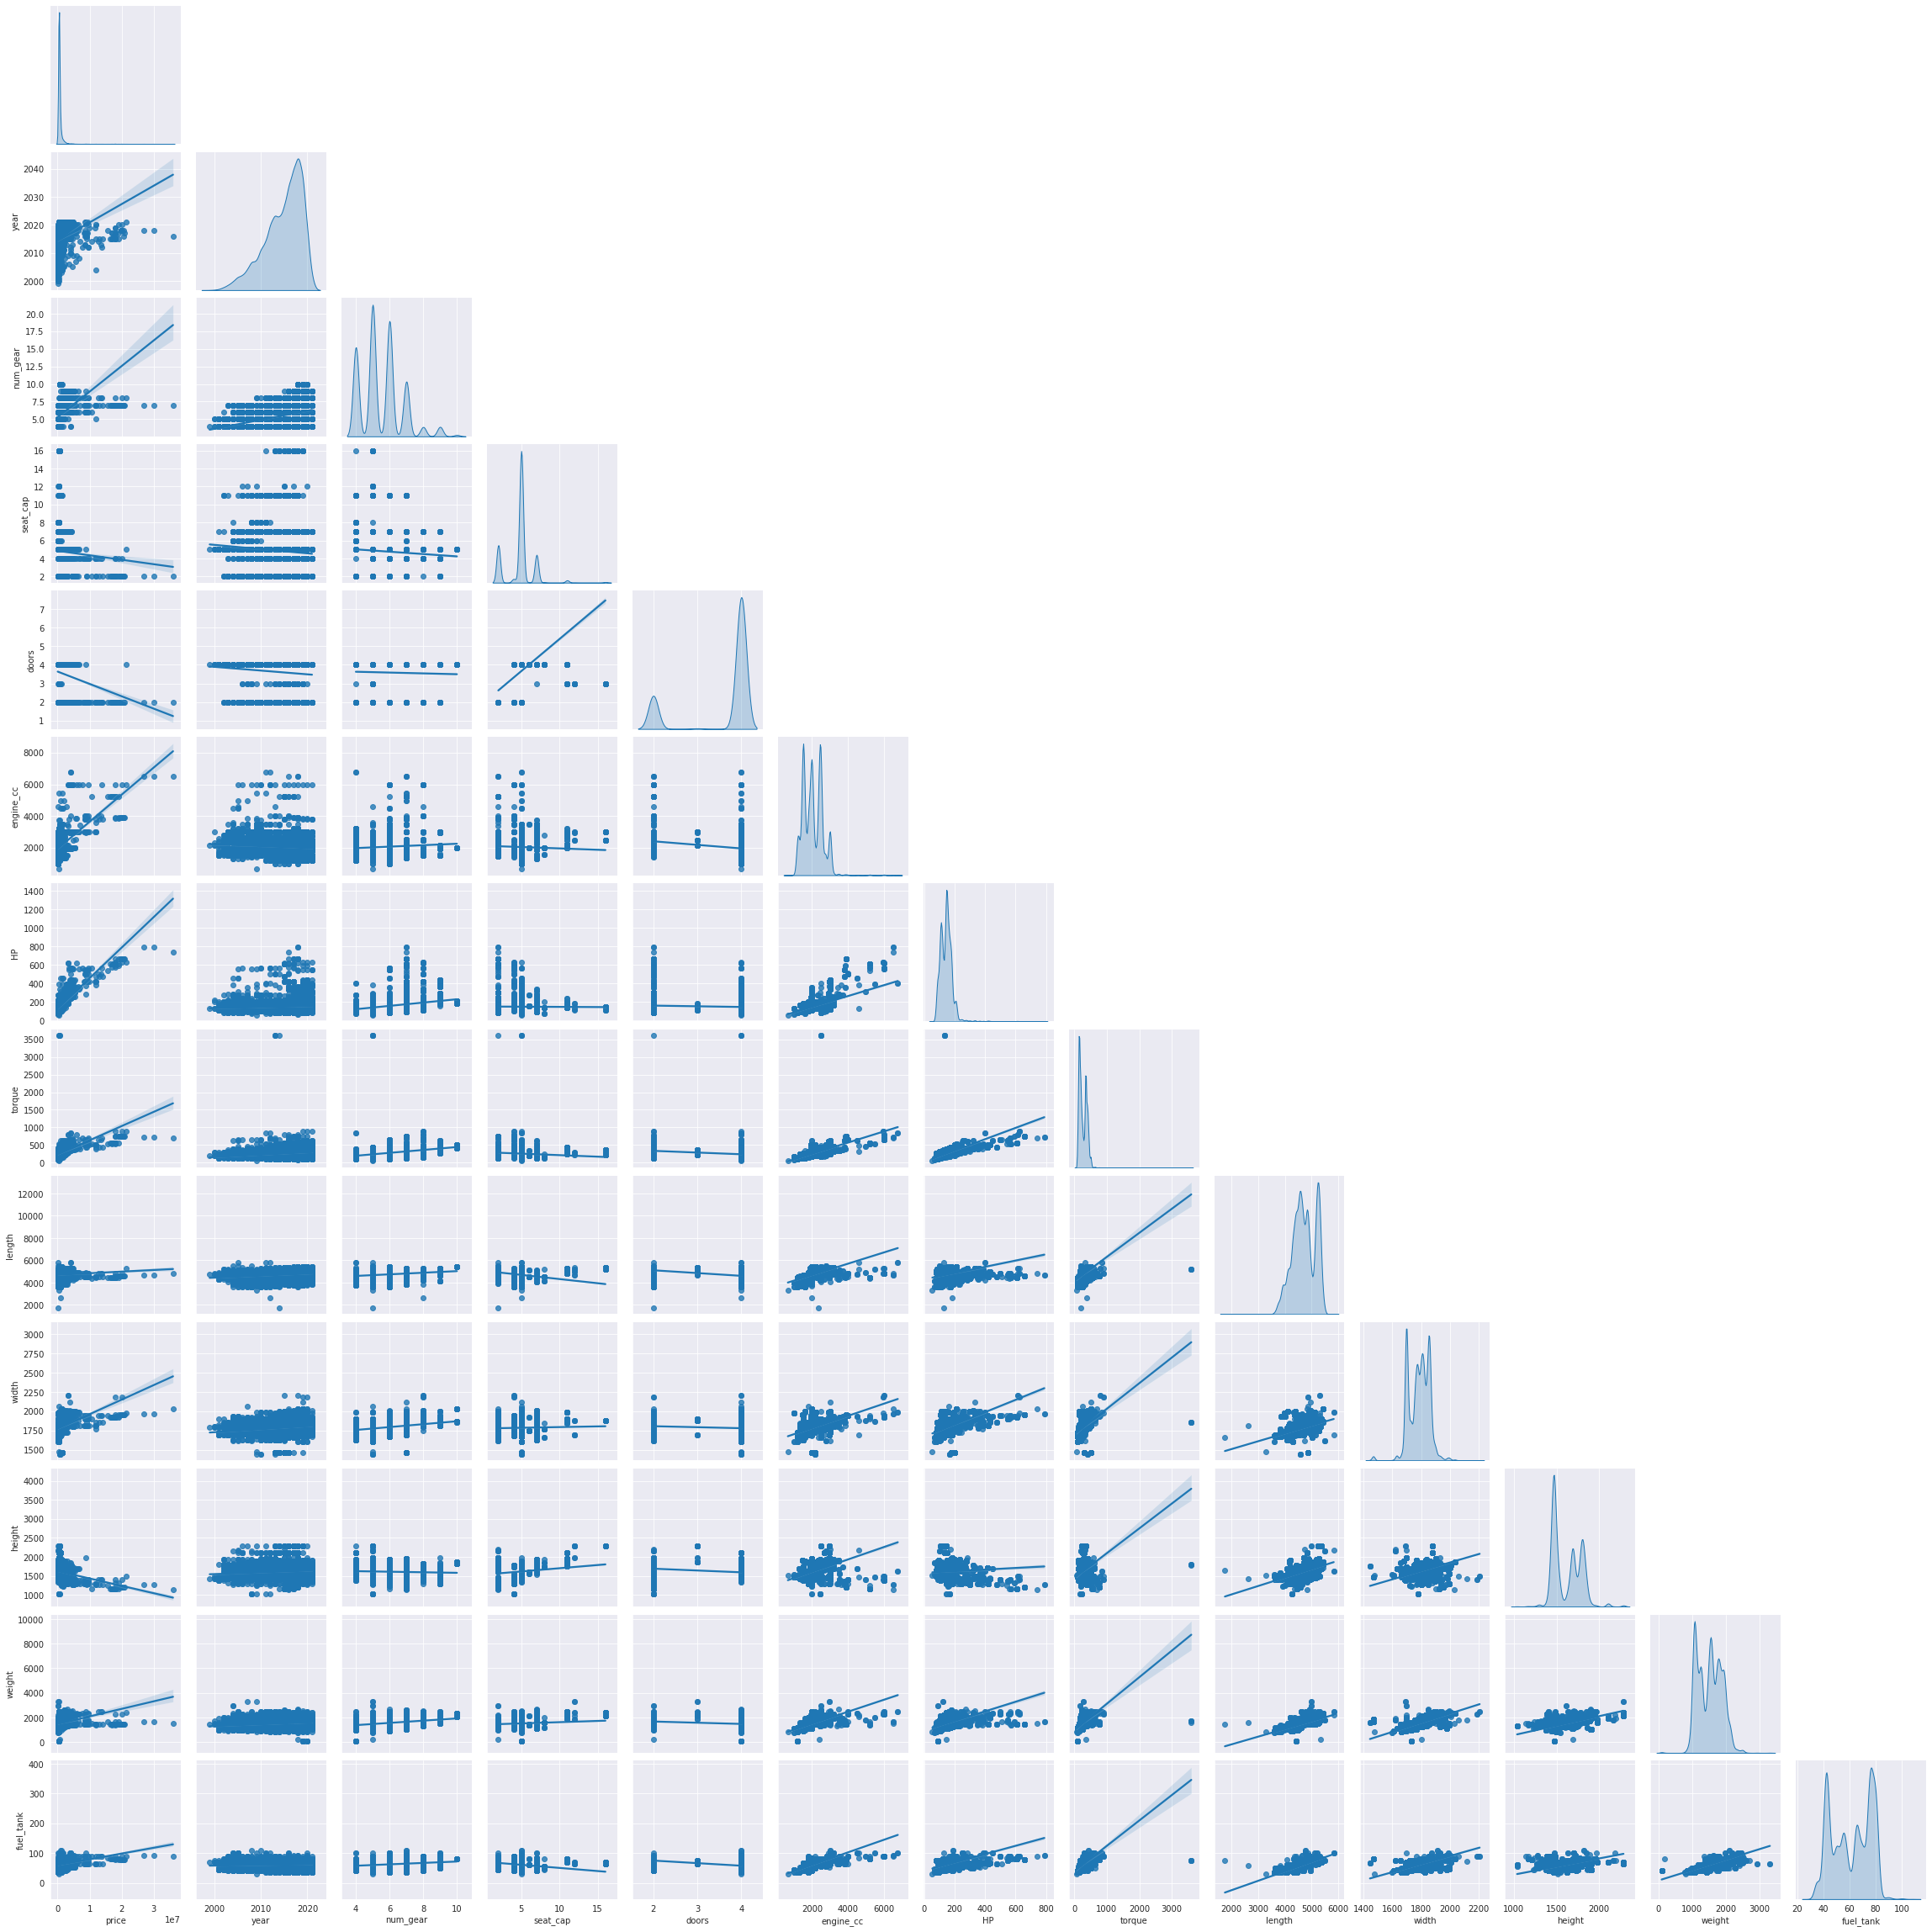

In [ ]:
sns.pairplot(car_info[cols], height = 2.5, diag_kind = "kde", corner = True, kind = "reg")
plt.show();

In [ ]:
import plotly.figure_factory as ff

### **CHECKING SKEWNESS**
- put only **numerical** column(s) that have skewness more than 1 

In [ ]:
data_model = car_info[["price", "year", "num_gear", "seat_cap", "doors", "engine_cc", "HP", "torque", "length", "width", "height", "weight", "fuel_tank", "Automatic", "Manual", "Diesel", "Petrol - Leaded", "Petrol - Unleaded (ULP)", "brand_label", "color_label", "mileage_target_encode"]]

In [ ]:
x = data_model.copy().drop(columns = "price")
y = data_model[["price"]]

#### **TARGET VARIABLE ( PRICE )**
- mu, sigma, skewness
- Distribution plot and qq plot

In [ ]:
y.describe()

price
count  1.606500e+04
mean   6.592865e+05
std    1.133206e+06
min    4.500000e+04
25%    3.490000e+05
50%    4.490000e+05
75%    6.160000e+05
max    3.600000e+07

 mu = 659286.51 and sigma = 1133170.71
 Skew of Target Variable = 13.04


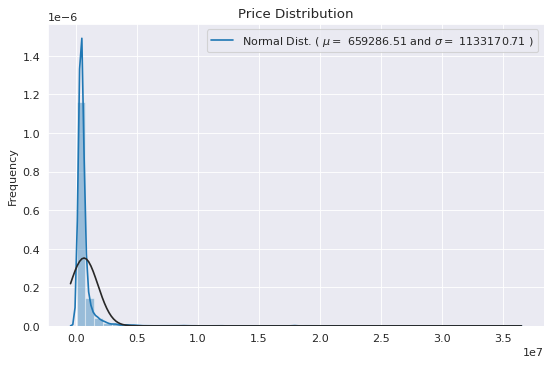

In [ ]:
# Get the fitted parameters used by the function
mu, sigma = norm.fit(y)

print(' mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print(' Skew of Target Variable = {:.2f}' .format(skew(np.array(y).flatten())))

plt.figure(figsize = (8, 5), dpi = 80)
sns.distplot(y, fit = norm);
plt.legend(['Normal Dist. ( $\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc = 'best')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [ ]:
from statsmodels.graphics.gofplots import qqplot

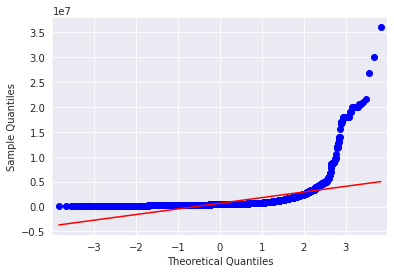

In [ ]:
qqplot_data = qqplot(np.array(y).flatten(), line='s').gca().lines

In [ ]:
fig = go.Figure()

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': '#004F6D'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': '#D41F3A'
    }
})


fig['layout'].update({
    'title': 'Quantile - Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Ordered Values'
    },
    'showlegend': False,
    'width': 1000,
    'height': 500
})

fig.show()

The target variable is right skew, so we have to transform to normal distribution which is appropriate to linear model.

We chose **Log Transformation** method for transform data to normal distribution

In [ ]:
y = np.log(y)

 mu = 13.11 and sigma = 0.62
 Skew of target variable = 1.42


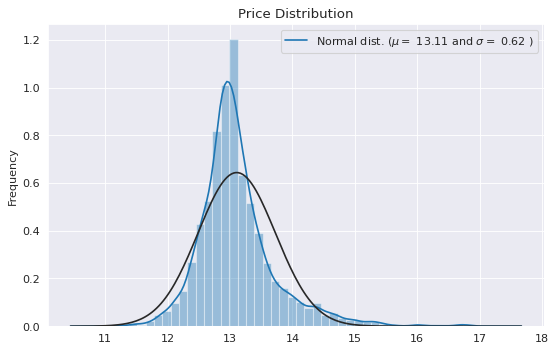

<Figure size 640x400 with 0 Axes>

In [ ]:
mu, sigma = norm.fit(y)

print(' mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print(' Skew of target variable = {:.2f}' .format(skew(np.array(y).flatten())))

plt.figure(figsize=(8, 5), dpi=80)
sns.distplot(np.array(y).flatten(), fit = norm);
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.figure(figsize=(8, 5), dpi=80)
plt.show()

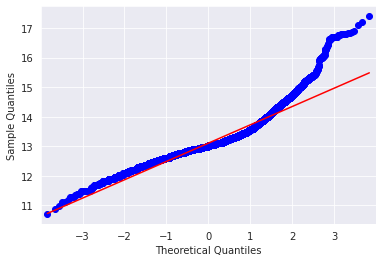

In [ ]:
qqplot_data = qqplot(np.array(y).flatten(), line='s').gca().lines

In [ ]:
fig = go.Figure()

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': '#004F6D'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': '#D41F3A'
    }

})


fig['layout'].update({
    'title': 'Quantile - Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Ordered Values'
    },
    'showlegend': False,
    'width': 1000,
    'height': 500,
})

fig.show()

#### **OTHER FEATURES EXCEPT TARGET VARIABLES**

In [ ]:
features = x[["year", "num_gear", "seat_cap", "doors", "engine_cc", "HP", "torque", "length", "width", "height", "weight", "fuel_tank"]]

In [ ]:
# Check the Skew of All Numerical Features
skew_features = features.apply(lambda x: skew(x)).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew' : skew_features})
skewness

Skew
torque     5.018261
HP         4.157963
engine_cc  1.065627
seat_cap   0.794073
num_gear   0.780074
height     0.477305
weight     0.121738
fuel_tank -0.142149
length    -0.181816
width     -0.422364
year      -0.845660
doors     -1.482344

**CONCLUSION** : Only **torque, HP and engine_cc** have a skew value more than 1

In [ ]:
feats = ["torque", "HP", "engine_cc"]

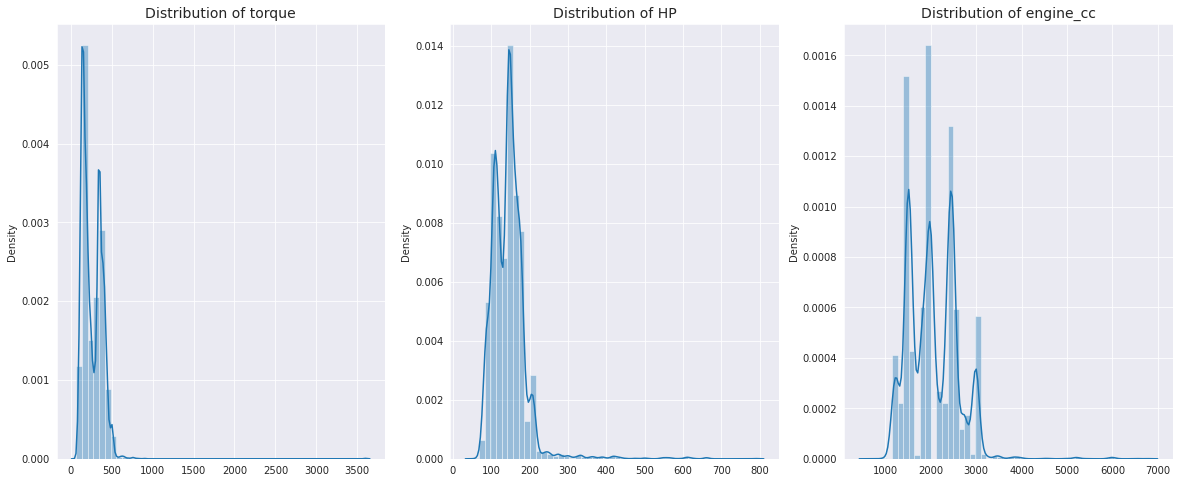

In [ ]:
# Plot Distribution of Features that have a skew value more than 1

fig, axes = plt.subplots(1, 3, figsize = (20, 8))

for i in range(len(feats)):
  hist_data = np.array(x[[feats[i]]])
  sns.distplot(hist_data, ax = axes[i])
  axes[i].set_title("Distribution of " + feats[i], size = 14)
plt.show()

In [ ]:
# Log Transform these features
for feat in feats:
    x[feat] = np.log(x[feat])

In [ ]:
x.head()

year  num_gear  seat_cap  ...  brand_label  color_label  mileage_target_encode
0  2015       4.0         5  ...           20           13          496834.745763
1  2015       4.0         5  ...           20            6          423372.093023
2  2016       6.0         2  ...           20           14          540771.373188
3  2019       6.0         5  ...           20           14          502067.685422
4  2013       5.0         7  ...           20            0          444067.647059

[5 rows x 20 columns]

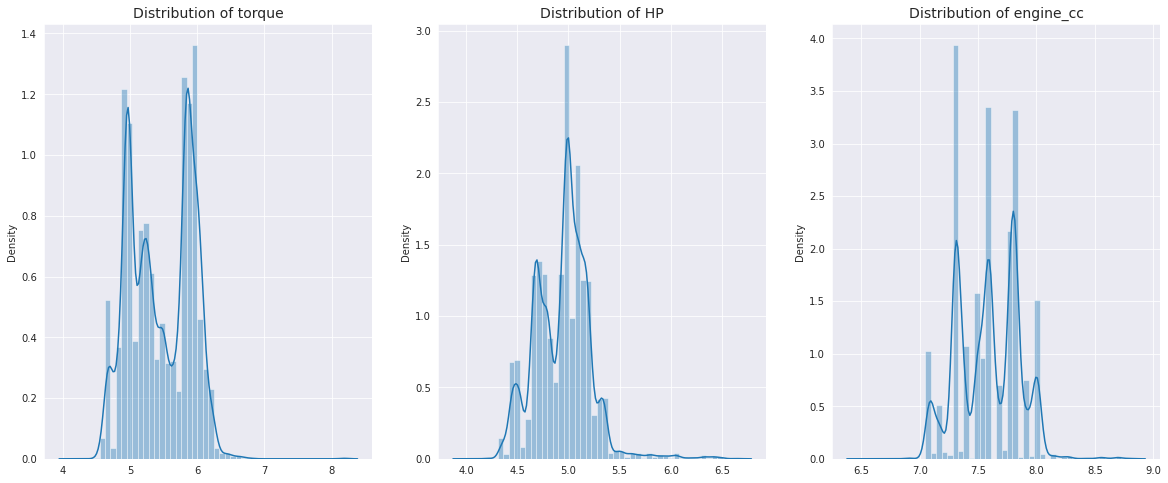

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (20, 8))

for i in range(len(feats)):
  hist_data = np.array(x[[feats[i]]])
  sns.distplot(hist_data, ax = axes[i])
  axes[i].set_title("Distribution of " + feats[i], size = 14)
plt.show()

### **AVERAGE PRICE OF EACH BRAND**



In [ ]:
car_info['brand'].unique()

array(['Toyota', 'Honda', 'Mercedes-benz', 'Bmw', 'Isuzu', 'Mazda',
       'Mitsubishi', 'Nissan', 'Audi', 'Chevrolet', 'Ferrari', 'Ford',
       'Bentley', 'Kia', 'Lexus', 'Lamborghini', 'Mg', 'Mini', 'Porsche',
       'Subaru', 'Suzuki', 'Volkswagen', 'Volvo'], dtype=object)

In [ ]:
# Collect Brand List and Sum Price of these Brands

brand_list, count, sum_price = [], [], []
for i in range(len(car_info)):
  brand = car_info['brand'].iloc[i]
  price = int(car_info['price'].iloc[i])
  if brand not in brand_list:
    brand_list.append(brand)
    count.append(1)
    sum_price.append(price)
  else:
    pos = brand_list.index(brand)
    count[pos] += 1
    sum_price[pos] += price

In [ ]:
print(brand_list)
print(sum_price)

['Toyota', 'Honda', 'Mercedes-benz', 'Bmw', 'Isuzu', 'Mazda', 'Mitsubishi', 'Nissan', 'Audi', 'Chevrolet', 'Ferrari', 'Ford', 'Bentley', 'Kia', 'Lexus', 'Lamborghini', 'Mg', 'Mini', 'Porsche', 'Subaru', 'Suzuki', 'Volkswagen', 'Volvo']
[3098910419, 839819386, 1926995697, 131550999, 917747458, 544071324, 606293890, 281702347, 112813000, 73809499, 292140000, 203998997, 205767000, 17657000, 36504000, 292530000, 160504149, 164852000, 475812000, 21422999, 63214900, 27144665, 96176000]


In [ ]:
df_brandxprice = pd.DataFrame(list(zip(brand_list, count, sum_price)), columns = ["brand", "amount", "sumPrice"])

In [ ]:
df_brandxprice['meanPrice'] = (df_brandxprice['sumPrice'] / df_brandxprice['amount']) / 1000000 # convert to format 10^6

In [ ]:
fig = px.bar(df_brandxprice.sort_values("meanPrice", ascending = False), x = "brand", y = "meanPrice", text = "meanPrice", 
             template="xgridoff", color_discrete_sequence=px.colors.qualitative.Set2, labels = {'brand':'Brand', 'meanPrice':'Average Price of Brand'})

fig.update_traces(texttemplate = '%{text:.2f}M', textposition = 'outside', textfont_size = 12)
fig.update_layout(height = 800, title_text = 'THE MOST AVERAGE PRICE OF EACH BRAND')
fig.show()

### **TRAIN - TEST SPLIT**
- Train 80 % Test 20 %

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 99)

### **NORMALIZATION**
Various of the normalization method to choose from include:
- MinMaxScaler
- StandardScaler
- RobustScaler

As some of the features may contain outliers so we will use **"RobustScaler"** as it is robust to the outlier

In [ ]:
import joblib

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# Fit Scaler on Training Dataset
scaler_x = RobustScaler()
scaler_x.fit(x_train)

# Transform Training Dataset
trainX = scaler_x.transform(x_train)

# Transform Testing Dataset
testX = scaler_x.transform(x_test)

In [ ]:
!mkdir model_pkl

In [ ]:
joblib.dump(scaler_x, "model_pkl/scaler_x.pkl")

['model_pkl/scaler_x.pkl']

In [ ]:
# Fit Scaler on Training Dataset
scaler_y = RobustScaler()
scaler_y.fit(y_train)

# Transform Training Dataset
trainY = scaler_y.transform(y_train)

# Transform Testing Dataset
testY = scaler_y.transform(y_test)

In [ ]:
joblib.dump(scaler_y, "model_pkl/scaler_y.pkl")

['model_pkl/scaler_y.pkl']

In [ ]:
df_trainX = pd.DataFrame()
for i in range(len(trainX)):
  to_append = pd.Series(trainX[i])
  df_trainX = df_trainX.append(to_append, ignore_index = True)

In [ ]:
df_trainX.describe()

0             1   ...            18            19
count  12852.000000  12852.000000  ...  12852.000000  12852.000000
mean      -0.201525      0.512605  ...     -0.331279      0.065210
std        0.669484      1.197583  ...      0.564213      0.765830
min       -2.833333     -1.000000  ...     -1.200000     -1.329517
25%       -0.666667      0.000000  ...     -0.800000     -0.502754
50%        0.000000      0.000000  ...      0.000000      0.000000
75%        0.333333      1.000000  ...      0.200000      0.497246
max        0.833333      5.000000  ...      0.300000      1.674129

[8 rows x 20 columns]

In [ ]:
pd.DataFrame(trainY, columns=["trainY"]).describe()

trainY
count  12852.000000
mean       0.166087
std        1.083099
min       -4.014357
25%       -0.439679
50%        0.000000
75%        0.560321
max        7.650953

## **MODELING**
There are many machine learning algorithm that suit with our regression problem, so we've selected the model from main three types of algorithm including Linear model, Ensemble model, and Deep neural networks

> **Linear Model**
- Multiple Linear Regression
- Regularization with ElasticNet

> **Ensemble Model**
- XGBoost Regressor
- LightGBM Regressor

> **Deep Neural Network**



In [ ]:
mean_cv_score = {}
r2_score = {}
mae_score = {}
rmse_score = {}

### **EVALUATION FUNCTION**

In [ ]:
from sklearn import metrics
from matplotlib import spines

#### **ERROR SCORE + PLOT GRAPH ERRORS**

In [ ]:
def model_cal(model, x_train, x_test, y_train, y_test, model_name):

    y_predict = model.predict(x_test)
    y_predict_train = model.predict(x_train)

    r2_train = round(metrics.r2_score(y_train, y_predict_train), 2)
    print('\nTrain R2 Score :', r2_train)
    
    mae_train = metrics.mean_absolute_error(y_train, y_predict_train)
    print('Train MAE :', mae_train)
    
    mse_train = metrics.mean_squared_error(y_train, y_predict_train)
    print('Train MSE :', mse_train)
    
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_predict_train))
    print('Train RMSE :', rmse_train)
    
    print('\n--------------------------------------------\n')

#     ++++++++++++++++++++++++++++++

    r2 = round(metrics.r2_score(y_test, y_predict), 2)
    r2_score[model_name] = [r2]
    print('Test R2 Score :', r2)
    
    mae = metrics.mean_absolute_error(y_test, y_predict)
    mae_score[model_name] = [mae]
    print('Test MAE :', mae)
    
    mse = metrics.mean_squared_error(y_test, y_predict)
    print('Test MSE :', mse)
    
    rmse= np.sqrt(metrics.mean_squared_error(y_test, y_predict))
    rmse_score[model_name] = [rmse]
    print('Test RMSE :', rmse)
    
    print('\n')
#     +++++++++++++++++++++++++++++
    
    plt.figure(figsize = (5,5), dpi = 100)
    plt.scatter(y_train, y_predict_train, alpha = 0.3, label = "Train data")
    plt.scatter(y_test, y_predict, alpha = 0.2, c = "lightgreen", label = "Test data")

    line = np.linspace(y_test.min(), y_test.max())
    plt.plot(line, line,"--k")
    plt.xlim([float(y_test.min()), float(y_test.max())])
    plt.ylim([float(y_test.min()), float(y_test.max())])
    plt.ylabel("Target Predicted")
    plt.xlabel("True Target")
    plt.title(f"{model_name} Result")
    extra = plt.Rectangle(
        (0, 0), 0, 0, fc = "w", fill = False, edgecolor = "none", linewidth = 0
    )

    score = (r"$R^2={:.2f}$" + "\n" + r"$MAE={:.2f}$" + "\n" + r"$RMSE={:.2f}$").format(r2, mae, rmse)
    plt.legend([extra], [score], loc = "upper left")
    plt.show()
    
    chart_regression(y_predict, y_test)

#### **RMSE CROSS VALIDATION SCORE**

In [ ]:
def rmse_cv_score(model):
    rmse = np.sqrt(-cross_val_score(model, scaler_x.transform(x), scaler_y.transform(y), scoring = "neg_mean_squared_error"))
    return rmse

#### **CHART REGRESSION**

In [ ]:
def chart_regression(pred, y, sort = True):
    t = pd.DataFrame({"pred": np.array(pred).flatten(), "y": np.array(y).flatten()})
    if sort:
        t.sort_values(by = ["y"], inplace = True)
    plt.figure(figsize = (5,5), dpi = 100)
    plt.plot(t['y'].tolist(), label = "expected")
    plt.plot(t['pred'].tolist(), label = "prediction", alpha = 0.5)
    plt.ylabel("output")
    plt.title("Lift Chart")
    plt.legend()
    plt.show()

### **LINEAR MODEL**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

#### **1. MULTIPLE LINEAR REGRESSION**

Ordinary Least Squared Method

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mul_linear = LinearRegression()

In [ ]:
mul_linear.fit(trainX, trainY)

LinearRegression()

##### **EVALUATION**

In [ ]:
mul_linear_score = rmse_cv_score(mul_linear)

mean_cv_score["Multiple Linear"] = [mul_linear_score.mean()]

print("\nCross Validation Score of Multiple Linear Regression")
print("-----------------------------------------------------")
print("Mean : {:.4f} \nStandard Deviation : {:.4f}\n".format(mul_linear_score.mean(), mul_linear_score.std()))


Cross Validation Score of Multiple Linear Regression
-----------------------------------------------------
Mean : 0.6018 
Standard Deviation : 0.1854



In [ ]:
print("Model Intercept is", mul_linear.intercept_[0])
print("Model Slope is", mul_linear.coef_[0])

Model Intercept is 0.43223665012337276
Model Slope is [ 0.67516129  0.07471444  0.13254276 -0.23722944  0.21563572  0.36614576
  0.6943923  -0.58141699  0.15865456 -0.71043963  0.42758331  0.01039465
  0.10600668 -0.10600668 -0.04618269 -0.02173566  0.06791835 -0.006658
 -0.01598585  0.05682166]



Train R2 Score : 0.79
Train MAE : 0.3693171600631006
Train MSE : 0.24468581708933637
Train RMSE : 0.4946572723506007

--------------------------------------------

Test R2 Score : 0.78
Test MAE : 0.3685270478060994
Test MSE : 0.2485486062527199
Test RMSE : 0.49854649357178304




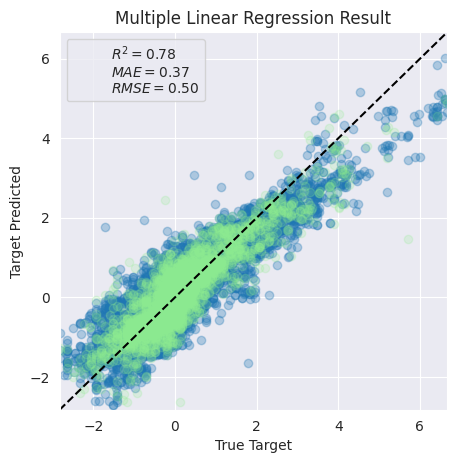

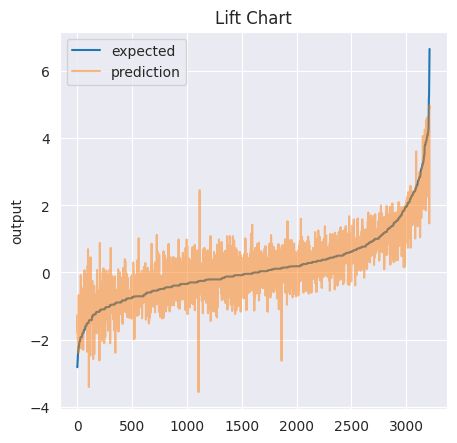

In [ ]:
model_cal(mul_linear, trainX, testX, trainY, testY, "Multiple Linear Regression")

#### **2. REGULARIZATION ( ELASTICNET )**
Since ElasticNet is the compromise of both Ridge and Lasso regularization, so we'll choose ElasticNet which is the hybrid between them.

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
elastic = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                       alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                       max_iter = 50000, cv = 10)

In [ ]:
elastic.fit(trainX, trainY)

ElasticNetCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03,
                     0.06, 0.1, 0.3, 0.6, 1, 3, 6],
             cv=10, l1_ratio=[0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
             max_iter=50000)

In [ ]:
elastic.l1_ratio_

0.7

##### **EVALUATION**

In [ ]:
elastic_score = rmse_cv_score(elastic)

mean_cv_score["ElasticNet"] = [elastic_score.mean()]

print("\nCross Validation Score of ElasticNet")
print("-----------------------------------------------------")
print("Mean : {:.4f} \nStandard Deviation : {:.4f}\n".format(elastic_score.mean(), elastic_score.std()))


Cross Validation Score of ElasticNet
-----------------------------------------------------
Mean : 0.6025 
Standard Deviation : 0.1840




Train R2 Score : 0.79
Train MAE : 0.3698560723767043
Train MSE : 0.24474520327302685
Train RMSE : 0.4947172963148012

--------------------------------------------

Test R2 Score : 0.78
Test MAE : 0.3688943615492965
Test MSE : 0.24865086639726136
Test RMSE : 0.4986490413078735




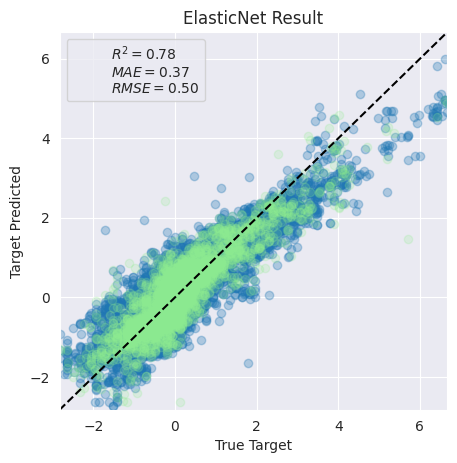

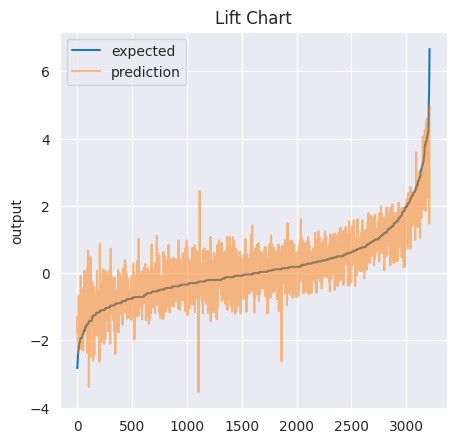

In [ ]:
model_cal(elastic, trainX, testX, trainY, testY, "ElasticNet")

ElasticNet picked 17 features and eliminated the other 3 features


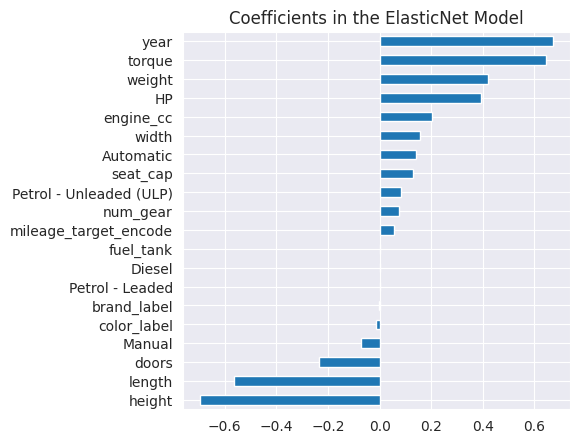

In [ ]:
coefs = pd.Series(elastic.coef_, index = x.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")

imp_coefs = coefs.sort_values()

plt.figure(figsize=(5,5), dpi=100)
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

### **ENSEMBLE MODEL**

#### **3. XGBOOST**

**XGBoost** contain three categories of parameters which can be set including:
- General parameters
- Booster parameters
- Learning task parameters

The parameter we're going to tune include:
- Gamma: minimum loss reduction required to make a split จำนวน loss ที่ลดลองน้อยที่สุดที่จะทำการ split node
- Reg_alpha: L1 regularization weight
- Reg_lambda: L2 regularization weight
- Colsample_bytree: สัดส่วน column ที่จะถูกสุ่มเลือกมาสร้าง tree
- Learning_rate: step การเรียนหรือการลด Weight
- Max_depth: ความลึกของ tree
- n_estimators: จำนวนรอบการ train 


**Baysien Optimization Parameter Tuning with HyperOpt**

In [ ]:
!pip install xgboost

In [ ]:
!pip install hyperopt

In [ ]:
import xgboost as xgb
from xgboost import plot_tree
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from hyperopt.pyll import scope

In [ ]:
params_space = {
      'gamma': hp.uniform ('gamma', 1,9),
      'reg_alpha' : scope.int(hp.quniform('reg_alpha', 0,100,1)),
      'reg_lambda' : hp.uniform('reg_lambda', 0,1),
      'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
      'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
      'max_depth': scope.int(hp.quniform('max_depth', 5, 30, 1)),
      'n_estimators': scope.int(hp.quniform('n_estimators', 100, 500, 1)),
        }

In [ ]:
def objective(space):
    clf=xgb.XGBRegressor(**space)
    
    
    train_X, val_X, train_Y, val_Y = train_test_split(trainX, trainY, test_size = 0.2)
    evaluation = [(train_X, train_Y), (val_X, val_Y)]
    
    clf.fit(train_X, train_Y,
            eval_metric = "rmse",
            eval_set = evaluation,
            early_stopping_rounds = 10,
            verbose = False)
    
    pred = clf.predict(val_X)
    rmse = np.sqrt(metrics.mean_squared_error(val_Y, pred))
    print ("SCORE:", rmse)
    return {'loss': rmse, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = params_space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials, 
                        verbose = 0)

[15:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
0.310795108045006
[15:46:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
0.3667747560748904
[15:46:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
0.3373285095280069
[15:46:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
0.38063252791410446
[15:46:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
0.42638243967896716
[15:47:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
0.37675947740293575
[15:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear i

In [ ]:
best_hyperparams

{'colsample_bytree': 0.7940421476482624,
 'gamma': 1.661165558375477,
 'learning_rate': 0.03188681769132924,
 'max_depth': 22.0,
 'n_estimators': 245.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.5606534250397261}

**Use best parameters to make the model**

In [ ]:
xgb_reg = xgb.XGBRegressor(colsample_bytree = float(best_hyperparams["colsample_bytree"]), 
                           gamma = float(best_hyperparams["gamma"]), 
                           max_depth = int(best_hyperparams["max_depth"]), 
                           reg_alpha = float(best_hyperparams["reg_alpha"]), 
                           reg_lambda = float(best_hyperparams["reg_lambda"]), 
                           learning_rate = float(best_hyperparams["learning_rate"]),
                           n_estimators = int(best_hyperparams["n_estimators"]),
                           objective = "reg:squarederror")

In [ ]:
xgb_reg.fit(trainX, trainY)

XGBRegressor(colsample_bytree=0.7940421476482624, gamma=1.661165558375477,
             learning_rate=0.03188681769132924, max_depth=22, n_estimators=245,
             objective='reg:squarederror', reg_alpha=0.0,
             reg_lambda=0.5606534250397261)

##### **EVALUATION**

In [ ]:
xgb_score = rmse_cv_score(xgb_reg)

mean_cv_score["XGBoost"] = [xgb_score.mean()]

print("\nCross Validation Score of XGBoost")
print("-----------------------------------------------------")
print("Mean : {:.4f} \nStandard Deviation : {:.4f}\n".format(xgb_score.mean(), xgb_score.std()))


Cross Validation Score of XGBoost
-----------------------------------------------------
Mean : 0.4712 
Standard Deviation : 0.2603




Train R2 Score : 0.97
Train MAE : 0.13709962223339497
Train MSE : 0.0340722891069555
Train RMSE : 0.1845868064270995

--------------------------------------------

Test R2 Score : 0.96
Test MAE : 0.15184167985431096
Test MSE : 0.04962893949218257
Test RMSE : 0.22277553611692325




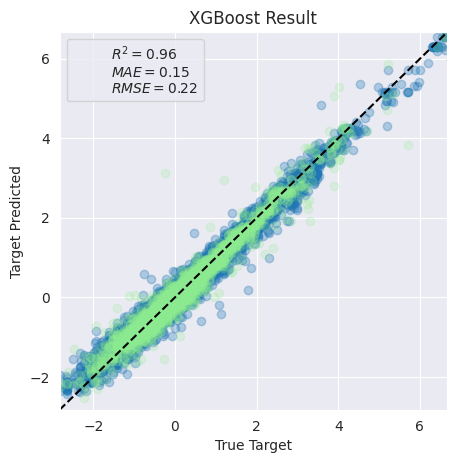

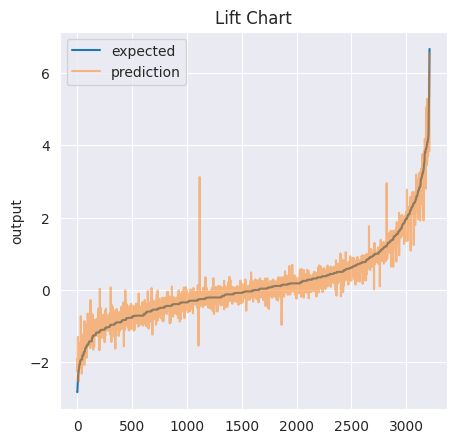

In [ ]:
model_cal(xgb_reg, trainX, testX, trainY, testY, "XGBoost")

**Visualize feature importance using native XGBoost plot_importance method**

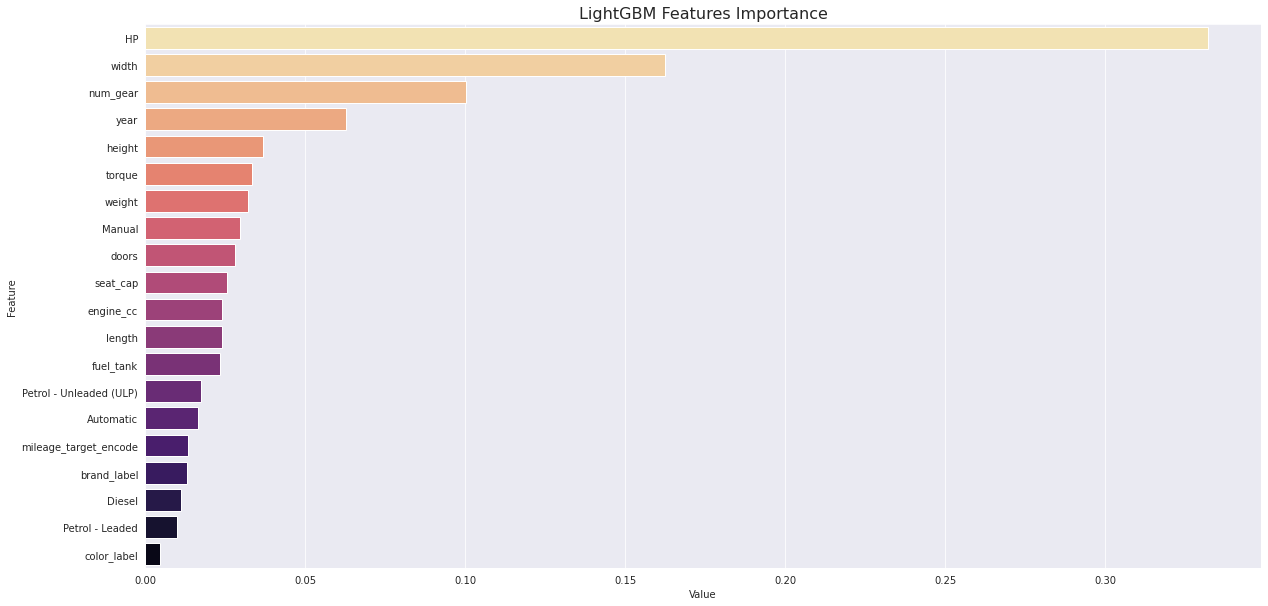

In [ ]:
feature_imp_xgb = pd.DataFrame(sorted(zip(xgb_reg.feature_importances_, x.columns)), columns=['Value', 'Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x = "Value", y = "Feature", data = feature_imp_xgb.sort_values(by = "Value", ascending = False), palette = "magma_r")
plt.title('LightGBM Features Importance', size = 16)
plt.show()

**Explain the model by SHAP value**

In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 7.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509238 sha256=d9d86ea971adf9c3827da048d48809a25a0438bab393848eb9064e551fb2e7b9
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import shap

In [ ]:
x_shap = pd.DataFrame(scaler_x.transform(x), columns = x.columns)

In [ ]:
explainer_xgb = shap.TreeExplainer(xgb_reg)
shap_values_xgb = explainer_xgb.shap_values(x_shap)

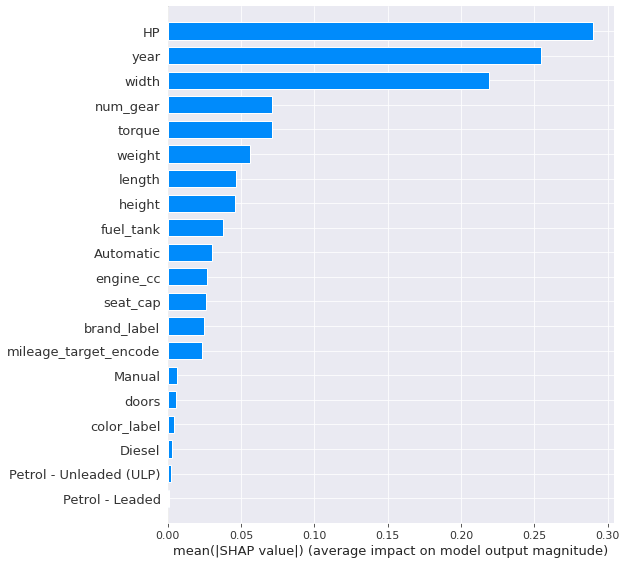

In [ ]:
shap.summary_plot(shap_values_xgb, x_shap, plot_type="bar")

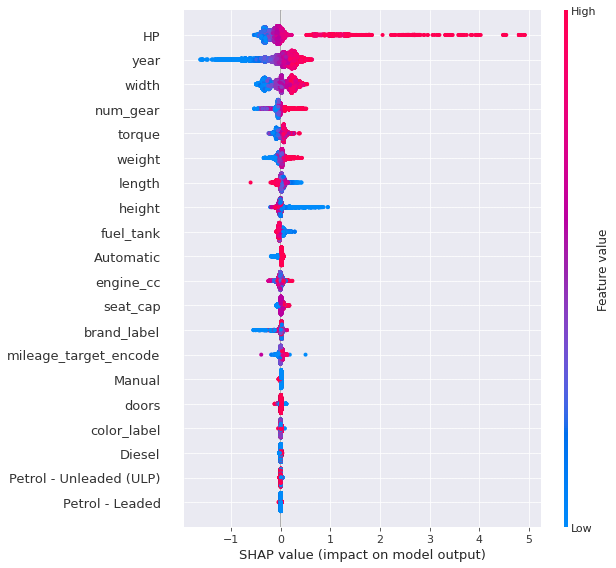

In [ ]:
shap.summary_plot(shap_values_xgb, x_shap)

#### **4. LIGHTGBM**

The tunable hyperparameters which may help improve medel performance
- Learning_rate: step of shrikage the loss
- Max_depth: ความลึกสูงสุดของ tree 
- Num_leaves: จำนวน leave node มากที่สุด
- Colsample_bytree: สัดส่วน column ที่จะถูกสุ่มเลือกมาสร้าง tree
- Reg_alpha: L1 regularization weight
- Reg_lambda: L2 regularization weight
- n_estimators: จำนวนรอบการ train 



In [ ]:
!pip install lightgbm==3.2.1

     |████████████████████████████████| 2.0 MB 10.2 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
import lightgbm as lgb

In [ ]:
params_lgbm = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 100, 500, 1)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 5, 50, 1)),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'reg_alpha' : scope.int(hp.quniform('reg_alpha', 0,50,1)),
}

In [ ]:
def objective_lgbm(space):
    clf = lgb.LGBMRegressor(**space)
    
    train_X, val_X, train_Y, val_Y = train_test_split(trainX, trainY, test_size = 0.2)
    evaluation = [(train_X, train_Y), (val_X, val_Y)]
    
    clf.fit(train_X, train_Y,
            eval_metric = "rmse",
            eval_set = evaluation,
            early_stopping_rounds = 10,
            verbose = False)
    
    pred = clf.predict(val_X)
    rmse = np.sqrt(metrics.mean_squared_error(val_Y, pred))
    print ("SCORE:", rmse)
    return {'loss': rmse, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams_lgbm = fmin(fn = objective_lgbm,
                        space = params_lgbm,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials,
                        verbose= 0)

SCORE:
0.3412573324065817
SCORE:
0.3047241493740558
SCORE:
0.24478749266430544
SCORE:
0.2790186127392969
SCORE:
0.2735142445704713
SCORE:
0.531366414076598
SCORE:
0.289062795626849
SCORE:
0.30075426951567885
SCORE:
0.24289938986674348
SCORE:
0.2435271737023928
SCORE:
0.5064595149550208
SCORE:
0.2790907907191925
SCORE:
0.2763756744821872
SCORE:
0.28584648985262767
SCORE:
0.28018809259388344
SCORE:
0.32227248021086097
SCORE:
0.24882668422703486
SCORE:
0.21222342898504443
SCORE:
0.28321495528921753
SCORE:
0.27603091395287743
SCORE:
0.23636057507995245
SCORE:
0.24364703230852547
SCORE:
0.21352182087456742
SCORE:
0.24202211361421744
SCORE:
0.24679087987685175
SCORE:
0.2202964379926627
SCORE:
0.2672935143334419
SCORE:
0.2640499731079203
SCORE:
0.28041457803322756
SCORE:
0.22891650216045692
SCORE:
0.2634235379198977
SCORE:
0.24295504174417554
SCORE:
0.264868639155079
SCORE:
0.31377418595183104
SCORE:
0.22962455901103185
SCORE:
0.23506641249241467
SCORE:
0.2396523360892412
SCORE:
0.29472952518

In [ ]:
best_hyperparams_lgbm

{'colsample_by_tree': 0.7081268098097147,
 'learning_rate': 0.3748327700764356,
 'max_depth': 10.0,
 'n_estimators': 269.0,
 'num_leaves': 26.0,
 'reg_alpha': 3.0,
 'reg_lambda': 0.36676179891486865}

In [ ]:
lgb_reg = lgb.LGBMRegressor(colsample_bytree = float(best_hyperparams_lgbm["colsample_by_tree"]), 
                            max_depth = int(best_hyperparams_lgbm["max_depth"]), 
                            reg_lambda = float(best_hyperparams_lgbm["reg_lambda"]),
                            reg_alpha = float(best_hyperparams_lgbm["reg_alpha"]),
                            learning_rate = float(best_hyperparams_lgbm["learning_rate"]),
                            n_estimators = int(best_hyperparams_lgbm["n_estimators"]),
                            num_leaves = int(best_hyperparams_lgbm["num_leaves"]),
                            boosting_type = "gbdt")

**Get the Cross Validation Score (RMSE) from the measurement function given the untrain model**

In [ ]:
lgb_reg.fit(trainX, trainY, eval_metric="rmse")

LGBMRegressor(colsample_bytree=0.7081268098097147,
              learning_rate=0.3748327700764356, max_depth=10, n_estimators=269,
              num_leaves=26, reg_alpha=3.0, reg_lambda=0.36676179891486865)

##### **EVALUATION**

In [ ]:
lgb_score = rmse_cv_score(lgb_reg)

mean_cv_score["LightGBM"] = [lgb_score.mean()]

print("\nCross Validation Score of LightGBM")
print("-----------------------------------------------------")
print("Mean : {:.4f} \nStandard Deviation : {:.4f}\n".format(lgb_score.mean(), lgb_score.std()))


Cross Validation Score of LightGBM
-----------------------------------------------------
Mean : 0.5177 
Standard Deviation : 0.3111




Train R2 Score : 0.98
Train MAE : 0.11573225566618942
Train MSE : 0.025842875010831618
Train RMSE : 0.1607571927188069

--------------------------------------------

Test R2 Score : 0.96
Test MAE : 0.14167251844885984
Test MSE : 0.048286330461442865
Test RMSE : 0.21974150828062244




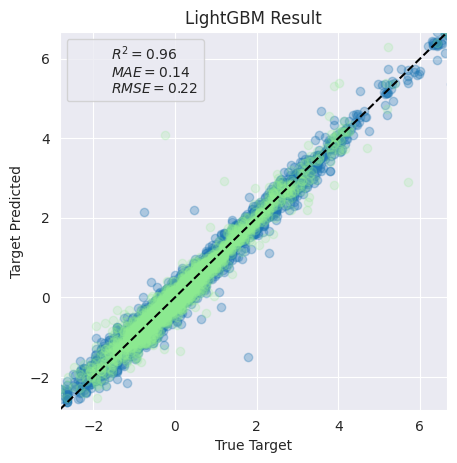

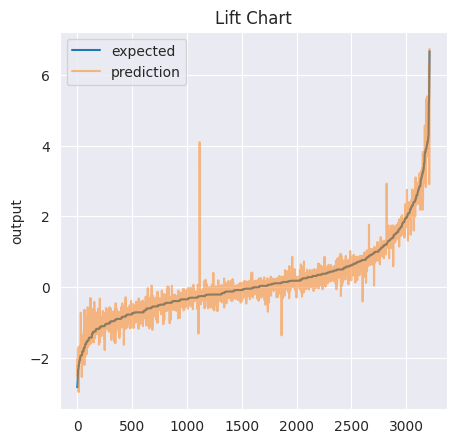

In [ ]:
model_cal(lgb_reg, trainX, testX, trainY, testY, "LightGBM")

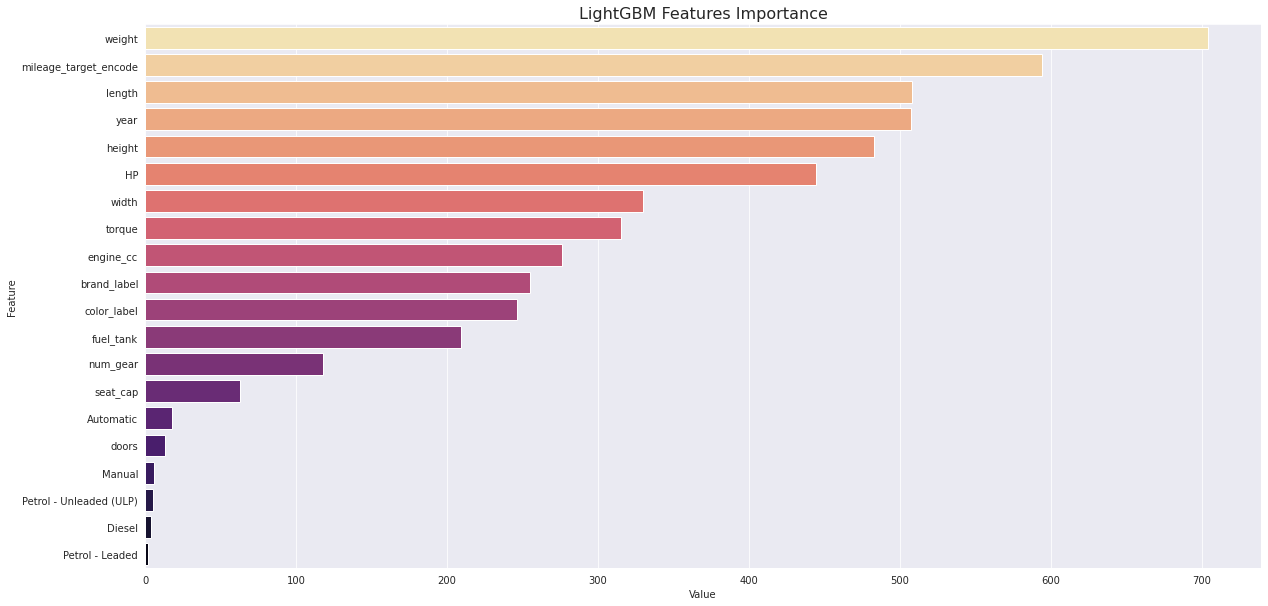

In [ ]:
feature_imp_lgb = pd.DataFrame(sorted(zip(lgb_reg.feature_importances_, x.columns)), columns = ['Value', 'Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x = "Value", y = "Feature", data = feature_imp_lgb.sort_values(by = "Value", ascending = False), palette = "magma_r")
plt.title('LightGBM Features Importance', size = 16)
plt.show()

**Explain the model using SHAP value**

In [ ]:
explainer_lgb = shap.TreeExplainer(lgb_reg)
shap_values_lgb = explainer_lgb.shap_values(x_shap)

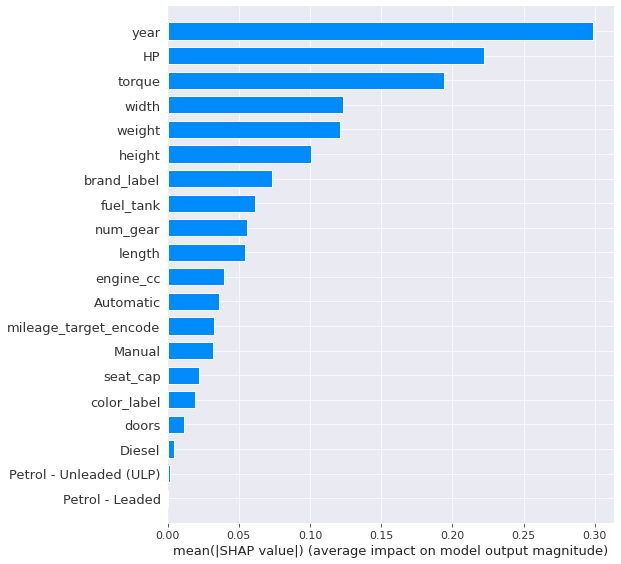

In [ ]:
shap.summary_plot(shap_values_lgb, x_shap, plot_type="bar")

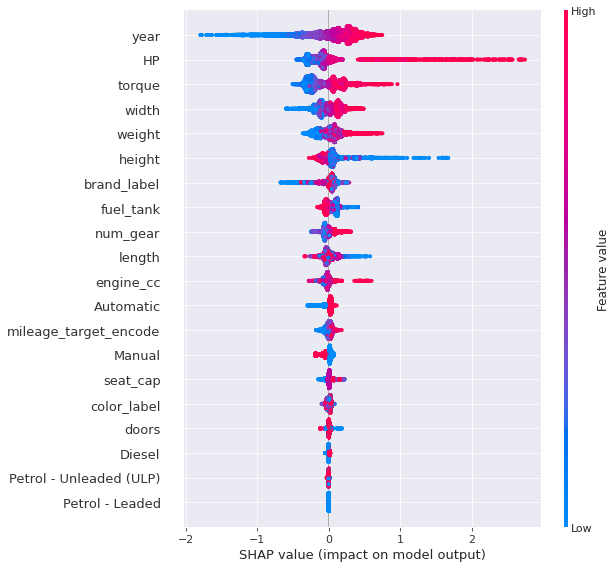

In [ ]:
shap.summary_plot(shap_values_lgb, x_shap)

### **DEEP NEURAL NETWORK**


Build the deep neural network using high level library keras

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 98 kB 3.9 MB/s 


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import BayesianOptimization
from kerastuner.engine.hyperparameters import HyperParameters

import datetime

print(tf.__version__)

2.7.0


#### **MODEL BUILDING**

In [ ]:
LOG_DIR = f"{int(time.time())}"

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(hp.Int("input_layers", 32, 256, 32), input_shape = (20, ), activation = "relu"))
    for i in range(hp.Int("n_layers", 1, 3)):
        model.add(layers.Dense(hp.Int(f"layers_{i}_units", 32, 256, 32), activation = "relu"))
    model.add(layers.Dense(1, activation = "linear"))
    
    model.compile(loss=keras.losses.MeanSquaredError(), 
                  optimizer = keras.optimizers.Adam(), 
                  metrics = [keras.metrics.RootMeanSquaredError()])
    return model

In [ ]:
tuner = BayesianOptimization(
    build_model,
    objective = "val_loss",
    max_trials = 10,
    executions_per_trial = 1,
    directory = LOG_DIR,
    overwrite = True
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5)

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir = log_dir)

In [ ]:
tuner.search(x = trainX,
             y = trainY,
             epochs = 100,
             validation_split = 0.2,
             callbacks = [callback, tensorboard_callback])

Trial 10 Complete [00h 02m 07s]
val_loss: 0.04992590844631195

Best val_loss So Far: 0.04637296870350838
Total elapsed time: 00h 12m 59s
INFO:tensorflow:Oracle triggered exit


**SAVE DEEP NEURAL NETWORK MODEL**

In [ ]:
tuner.get_best_models()[0].save("model_pkl/dnn_regression")

INFO:tensorflow:Assets written to: model_pkl/dnn_regression/assets


#### **ZIP AND DOWNLOAD DEEP NEURAL NETWORK MODEL**

In [ ]:
!zip -r /content/dnn_regression.zip /content/model_pkl/dnn_regression

	zip warning: name not matched: /content/model_pkl/dnn_regression

zip error: Nothing to do! (try: zip -r /content/dnn_regression.zip . -i /content/model_pkl/dnn_regression)


In [ ]:
from google.colab import files
files.download("/content/dnn_regression.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **IMPORT EXIST DEEP NEURAL NETWORK MODEL**

In [ ]:
# Download File .zip
!gdown --id 124qjpqE6t0Bj74Gg2npo4GCx1-jCxvzy -O /content/model_pkl/dnn_regression.zip

Downloading...
From: https://drive.google.com/uc?id=124qjpqE6t0Bj74Gg2npo4GCx1-jCxvzy
To: /content/model_pkl/dnn_regression.zip
100% 1.47M/1.47M [00:00<00:00, 86.3MB/s]


In [ ]:
!mkdir model_pkl/existDNNModel

In [ ]:
!unzip /content/model_pkl/dnn_regression.zip -d /content/model_pkl/existDNNModel

Archive:  /content/model_pkl/dnn_regression.zip
   creating: /content/model_pkl/existDNNModel/content/model_pkl/dnn_regression/
   creating: /content/model_pkl/existDNNModel/content/model_pkl/dnn_regression/assets/
   creating: /content/model_pkl/existDNNModel/content/model_pkl/dnn_regression/variables/
  inflating: /content/model_pkl/existDNNModel/content/model_pkl/dnn_regression/variables/variables.data-00000-of-00001  
  inflating: /content/model_pkl/existDNNModel/content/model_pkl/dnn_regression/variables/variables.index  
  inflating: /content/model_pkl/existDNNModel/content/model_pkl/dnn_regression/saved_model.pb  
  inflating: /content/model_pkl/existDNNModel/content/model_pkl/dnn_regression/keras_metadata.pb  


#### **EVALUATION**

In [ ]:
dnn_model = tf.keras.models.load_model('/content/model_pkl/existDNNModel/content/model_pkl/dnn_regression')

In [ ]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5376      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 137,217
Trainable params: 137,217
Non-trainable params: 0
_________________________________________________________________


**using the same structure of neural network for bulding new model and construct cross-validation evaluation**

In [ ]:
kf = KFold(5, shuffle=True)

xtemp = scaler_x.transform(x.copy())
ytemp = scaler_y.transform(y.copy())
tmp_y =  []
tmp_pred = []

fold = 0
for train, test in kf.split(x):
    fold += 1
    
    x_train = xtemp[train]
    y_train = ytemp[train]
    x_test = xtemp[test]
    y_test = ytemp[test]
    
    model = keras.Sequential()
    model.add(layers.Dense(256, input_shape = (20, ), activation = "relu"))
    model.add(layers.Dense(256, activation = "relu"))
    model.add(layers.Dense(256, activation = "relu"))
    model.add(layers.Dense(1, activation = "linear"))
    model.compile(loss=keras.losses.MeanSquaredError(), 
                  optimizer = keras.optimizers.Adam(), 
                  metrics = [keras.metrics.RootMeanSquaredError()])
    
    model.fit(x_train, y_train, validation_data = (x_test, y_test), verbose = 0, epochs = 70)
    
    pred = model.predict(x_test)
    
    tmp_y.append(y_test)
    tmp_pred.append(pred)
    
    score = np.sqrt(metrics.mean_squared_error(pred, y_test))
    print(f"FOLD {fold} RMSE: {score}")

tmp_y = np.concatenate(tmp_y)
tmp_pred = np.concatenate(tmp_pred)
score_nn = np.sqrt(metrics.mean_squared_error(tmp_pred, tmp_y))
mean_cv_score["DNN"] = [score_nn]
print(f"NN CV Score: {score_nn}")

FOLD 1 RMSE: 0.21382358298466525
FOLD 2 RMSE: 0.24786489981433704
FOLD 3 RMSE: 0.2173521280403944
FOLD 4 RMSE: 0.22705162815014543
FOLD 5 RMSE: 0.22459413435968412
NN CV Score: 0.22644842582736896



Train R2 Score : 0.97
Train MAE : 0.12657043003259547
Train MSE : 0.031873970341122056
Train RMSE : 0.17853282706864318

--------------------------------------------

Test R2 Score : 0.95
Test MAE : 0.1578125703630194
Test MSE : 0.0540796510956312
Test RMSE : 0.23255031949156982




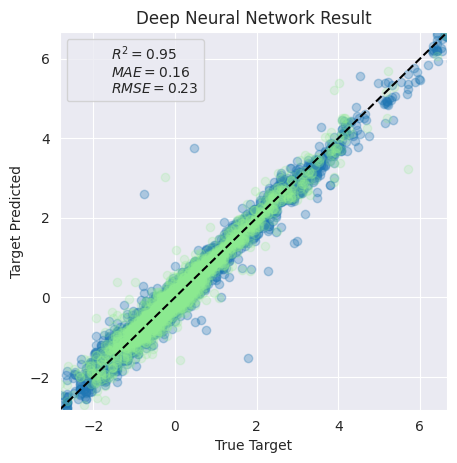

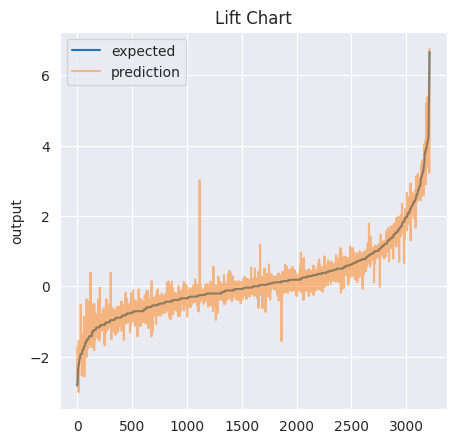

In [ ]:
model_cal(dnn_model, trainX, testX, trainY, testY, "Deep Neural Network")

## **MODEL EVALUATION**

### **EVALUATION METRICS**
> **R Square** is a good measure to determine how well the model fits the dependent variables

> **MAE ( Mean Absolute Error )** is a measure of errors between paired observations expressing the same phenomenon.


> **MSE ( Mean Square Error )** is the average of the square of the errors.

> **RMSE ( Root Mean Square Error )** is the square root of the mean of the square of all of the error. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and makes it easier for interpretation.

> **Lift Chart**
  - Sort data by expected output
  - Plot the actual value with blue line
  - Plot predicted value on with orange
  - Visualize how well is the prediction given the actual and predicted value
  - **Actual and predicted line should be close**

### **MODEL COMPARISON**

- DataFrame compare different important metrics
- Bar plot for visualizaton

#### **COMPARE EVALUATION METRICS WITH BAR PLOT**

##### **MEAN CROSS-VALIDATION SCORE**

In [ ]:
mean_cv_score

{'DNN': [0.22850442673997584],
 'ElasticNet': [0.6025265577970814],
 'LightGBM': [0.4906282741154758],
 'Multiple Linear': [0.601782824314453],
 'XGBoost': [0.6114552632863617]}

In [ ]:
df_mean_cv = pd.DataFrame(list(zip(mean_cv_score.keys(), mean_cv_score.values())), columns = ["model", "meanCVScore"])

In [ ]:
for i in range(len(df_mean_cv)):
  df_mean_cv['meanCVScore'].iloc[i] = df_mean_cv['meanCVScore'].astype(str).iloc[i][1:-1]

In [ ]:
df_mean_cv

model          meanCVScore
0  Multiple Linear    0.601782824314453
1       ElasticNet   0.6025265577970814
2          XGBoost   0.6114552632863617
3         LightGBM   0.4906282741154758
4              DNN  0.22850442673997584

In [ ]:
fig = px.bar(df_mean_cv.sort_values("meanCVScore", ascending = False), x = "model", y = "meanCVScore", text = "meanCVScore", 
             template="xgridoff", color_discrete_sequence=px.colors.qualitative.Pastel1, labels = {'model':'MODEL', 'meanCVScore':'MEAN CROSS-VALIDATION SCORE'})

fig.update_traces(texttemplate = '%{text:.3f}', textposition = 'outside', textfont_size = 12)
fig.update_layout(height = 500, title_text = 'MEAN CROSS-VALIDATION SCORE OF MODELS', yaxis_range = [0, 0.8])
fig.show()

##### **R2 SCORE**

In [ ]:
r2_score

{'Deep Neural Network': [0.95],
 'ElasticNet': [0.78],
 'LightGBM': [0.96],
 'Multiple Linear Regression': [0.78],
 'XGBoost': [0.95]}

In [ ]:
df_r2score = pd.DataFrame(list(zip(r2_score.keys(), r2_score.values())), columns = ["model", "R2Score"])

In [ ]:
for i in range(len(df_r2score)):
  df_r2score['R2Score'].iloc[i] = df_r2score['R2Score'].astype(str).iloc[i][1:-1]

In [ ]:
df_r2score

model R2Score
0  Multiple Linear Regression    0.78
1                  ElasticNet    0.78
2                     XGBoost    0.95
3                    LightGBM    0.96
4         Deep Neural Network    0.95

In [ ]:
fig = px.bar(df_r2score.sort_values("R2Score", ascending = False), x = "model", y = "R2Score", text = "R2Score",
             template="xgridoff", color_discrete_sequence=px.colors.qualitative.Set3, labels = {'model':'MODEL', 'R2Score':'R2 SCORE'})

fig.update_traces(texttemplate = '%{text:.3f}', textposition = 'outside', textfont_size = 12)
fig.update_layout(height = 600, title_text = 'R2 SCORE OF MODELS', yaxis_range = [0, 1.05])
fig.show()

##### **MEAN AVERAGE ERROR ( MAE )**

In [ ]:
mae_score

{'Deep Neural Network': [0.1578125703630194],
 'ElasticNet': [0.3688943615492965],
 'LightGBM': [0.14135068474356896],
 'Multiple Linear Regression': [0.3685270478060994],
 'XGBoost': [0.15993502524192843]}

In [ ]:
df_mae_score = pd.DataFrame(list(zip(mae_score.keys(), mae_score.values())), columns = ["model", "MAEScore"])

In [ ]:
for i in range(len(df_mae_score)):
  df_mae_score['MAEScore'].iloc[i] = df_mae_score['MAEScore'].astype(str).iloc[i][1:-1]

In [ ]:
df_mae_score

model             MAEScore
0  Multiple Linear Regression   0.3685270478060994
1                  ElasticNet   0.3688943615492965
2                     XGBoost  0.15993502524192843
3                    LightGBM  0.14135068474356896
4         Deep Neural Network   0.1578125703630194

In [ ]:
fig = px.bar(df_mae_score.sort_values("MAEScore", ascending = True), x = "model", y = "MAEScore", text = "MAEScore",
             template="xgridoff", color_discrete_sequence=px.colors.qualitative.Light24_r, labels = {'model':'MODEL', 'MAEScore':'MAE SCORE'})

fig.update_traces(texttemplate = '%{text:.3f}', textposition = 'outside', textfont_size = 12)
fig.update_layout(height = 600, title_text = 'MAE SCORE OF MODELS', yaxis_range = [0, 0.45])
fig.show()

##### **ROOT MEAN SQUARE ERROR ( RMSE )**

In [ ]:
rmse_score

{'Deep Neural Network': [0.23255031949156982],
 'ElasticNet': [0.4986490413078735],
 'LightGBM': [0.20885851617713178],
 'Multiple Linear Regression': [0.49854649357178304],
 'XGBoost': [0.24493600173242022]}

In [ ]:
df_rmse_score = pd.DataFrame(list(zip(rmse_score.keys(), rmse_score.values())), columns = ["model", "RMSEScore"])

In [ ]:
for i in range(len(df_rmse_score)):
  df_rmse_score['RMSEScore'].iloc[i] = df_rmse_score['RMSEScore'].astype(str).iloc[i][1:-1]

In [ ]:
df_rmse_score

model            RMSEScore
0  Multiple Linear Regression  0.49854649357178304
1                  ElasticNet   0.4986490413078735
2                     XGBoost  0.24493600173242022
3                    LightGBM  0.20885851617713178
4         Deep Neural Network  0.23255031949156982

In [ ]:
fig = px.bar(df_rmse_score.sort_values("RMSEScore", ascending = True), x = "model", y = "RMSEScore", text = "RMSEScore",
             template="xgridoff", color_discrete_sequence=px.colors.qualitative.T10_r, labels = {'model':'MODEL', 'RMSEScore':'RMSE SCORE'})

fig.update_traces(texttemplate = '%{text:.3f}', textposition = 'outside', textfont_size = 12)
fig.update_layout(height = 600, title_text = 'RMSE SCORE OF MODELS', yaxis_range = [0, 0.55])
fig.show()

## **CONCLUSION**


จากกระบวนการ Data Science ทั้งหมดที่ได้ทำ
- เราได้ทำการ Scrap ข้อมูลจากหน้าเว็บ One2Car
- ทำการ Transform ข้อมูลด้วย Technique เช่น One Hot Encoding, Label Encoding, Log Transform
- ทำการ Normalize ข้อมูลด้วย RobustScaler
- ด้วยการสร้าง Model ทั้งสามรูปแบบ 
  - Linear Model มีประสิทธิภาพใกล้เคียงกัน
  - Ensemble Method มีประสิทธิภาพที่ดีกว่า Linear Model พอสมควร แต่ทั้งสอง Model ในประเภทนี้ที่เลือกมาใช้ มีประสิทธิภาพใกล้เคียงกัน
  - Deep Neural Network มีประสิทธิภาพใกล้เคียงกับ Ensemble Method แต่จาก Mean ของ RMSE CV Score แสดงให้เห็นว่า DNN มีคุณสมบัติ Generalized มากกว่า Model อื่นๆ ด้วย Metrics ดังนี้
    -  MEAN RMSE CV Score: 0.23189469654209696
    - R2 Score : 0.95
    - MAE : 0.1578125703630194
    - RMSE : 0.23255031949156982


ทั้งนี้ กระบวนทั้งหมดอาจยังสามารถเพิ่มประสิทธิภาพได้ โดยมีแนวทางดังนี้
- การหาแหล่งข้อมูลมาใช้ในการทดลองเพิ่มขึ้น
- การทดสอบการใช้งาน Normalization ประเภทอื่นๆ
- การ Transform ข้อมูลแบบอื่นเช่น Imputation
- การทำ Feature Selection จาก Feature Importance หรือ SHAP value
- การศึกษา Model ที่ได้ทำการทดลองไปแล้วอย่างลึกซึ้งมากขึ้น เพื่อให้สามารถปรับ tune และตั้งค่าได้อย่างถูกต้อง และเข้าใจถึงแนวทางการใช้งาน
- การศึกษ Deep Learning เพิ่มเติมเพื่อการออกแบบและสร้าง Model ได้อย่างถูกต้องและมีประสิทธิภาพ


## **DEPLOYMENT**

In [ ]:
!pip install colabcode

     |████████████████████████████████| 745 kB 4.8 MB/s 
     |████████████████████████████████| 8.3 MB 34.1 MB/s 
     |████████████████████████████████| 45 kB 2.3 MB/s 
     |████████████████████████████████| 394 kB 23.1 MB/s 
     |████████████████████████████████| 428 kB 34.9 MB/s 
     |████████████████████████████████| 58 kB 3.4 MB/s 
     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 125 kB 45.1 MB/s 
     |████████████████████████████████| 78 kB 4.9 MB/s 
     |████████████████████████████████| 52 kB 1.0 MB/s 
     |████████████████████████████████| 124 kB 34.8 MB/s 
     |████████████████████████████████| 124 kB 26.9 MB/s 
     |████████████████████████████████| 122 kB 45.6 MB/s 
     |████████████████████████████████| 122 kB 46.1 MB/s 
     |████████████████████████████████| 122 kB 47.7 MB/s 
     |████████████████████████████████| 122 kB 36.8 MB/s 
     |████████████████████████████████| 112 kB 46.2 MB/s 
     |███████████████████

In [ ]:
!pip install fastapi

     |████████████████████████████████| 51 kB 332 kB/s 
     |████████████████████████████████| 10.1 MB 7.8 MB/s 
     |████████████████████████████████| 61 kB 170 kB/s 


In [ ]:
from colabcode import ColabCode
from fastapi import FastAPI

In [ ]:
cc = ColabCode(port = 8000, code = False)

In [ ]:
def preprocess_data(data):
    color_list = {'Black': 0,
             'Blue': 1,
             'Brown': 2,
             'Cream': 3,
             'Golden': 4,
             'Green': 5,
             'Grey Bronze': 6,
             'Light blue': 7,
             'Orange': 8,
             'Other': 9,
             'Pink': 10,
             'Purple': 11,
             'Red': 12,
             'Silver Bronze': 13,
             'White': 14,
             'Yellow': 15}
    brand_map = {'audi': 0,
                 'bentley': 1,
                 'bmw': 2,
                 'chevrolet': 3,
                 'ferrari': 4,
                 'ford': 5,
                 'honda': 6,
                 'isuzu': 7,
                 'kia': 8,
                 'lamborghini': 9,
                 'lexus': 10,
                 'mazda': 11,
                 'mercedes-benz': 12,
                 'mg': 13,
                 'mini': 14,
                 'mitsubishi': 15,
                 'nissan': 16,
                 'porsche': 17,
                 'subaru': 18,
                 'suzuki': 19,
                 'toyota': 20,
                 'volkswagen': 21,
                 'volvo': 22}

    data["color"] = data["color"].map(color_list)
    data["brand"] = data["brand"].map(brand_map)

    if data["transmission"][0] == "Automatic":
        data["Automatic"] = 1
        data["Manual"] = 0
    else:
        data["Automatic"] = 0
        data["Manual"] = 1

    fuel_type = ['Petrol - Unleaded (ULP)', 'Diesel', 'Petrol - Leaded']
    if data["fuel_type"][0] in fuel_type:
        fuel_type.remove(data["fuel_type"][0])
        tmp = data["fuel_type"]
        data[tmp] = 1
        for fuel in fuel_type:
            data[fuel] = 0
    else:
        for fuel in fuel_type:
            data[fuel] = 0

    return data

def normalize(data):
    list_nor = ["torque", "HP", "engine_cc"]
    for i in list_nor:
        data[i] = np.log(data[i])

    scaler_x = joblib.load("model_pkl/scaler_x.pkl")
    data = scaler_x.transform(data)
    return data

In [ ]:
app = FastAPI()

@app.get("/")
def read_root():
    return {"Used Car Prediction API": "Check out /docs for API documentation"}

@app.get("/predict_car")
async def predict_car(brand:str,
                      year:int,
                      color:str,
                      mileage:float,
                      seat_cap:int,
                      transmission:str,
                      doors:int,
                      engine_cc:float,
                      fuel_type:str,
                      num_gear:int,
                      HP:int,
                      torque:int,
                      length:float,
                      width:float,
                      height:float,
                      weight:float,
                      fuel_tank:float):
  
    query = [[brand, year, color, mileage, seat_cap, transmission, doors, engine_cc, fuel_tank, 
              fuel_type, num_gear, HP, torque, length, width, height, weight]]

    query = pd.DataFrame(query, columns= ["brand", "year", "color", "mileage", "seat_cap", "transmission", "doors", "engine_cc",
                                          "fuel_tank", "fuel_type", "num_gear", "HP", "torque", "length", "width", "height", "weight"])

    cleaned = preprocess_data(query)
    cleaned = cleaned[["year", "num_gear", "seat_cap", "doors", "engine_cc", "HP", "torque", "length", "width", "height", "weight", "fuel_tank", "Automatic", "Manual", "Diesel", "Petrol - Leaded", "Petrol - Unleaded (ULP)", "brand", "color", "mileage"]]
    cleaned_normalized = normalize(cleaned)
    print(cleaned)

    dnn_model = keras.models.load_model("/content/model_pkl/existDNNModel/content/model_pkl/dnn_regression")

    pred = dnn_model.predict(cleaned_normalized)
    scaler_y = joblib.load("model_pkl/scaler_y.pkl")
    pred = scaler_y.inverse_transform(pred.reshape(-1,1))
    pred = np.exp(pred)

    return {"Price": float(pred)}

In [ ]:
cc.run_app(app = app)

Public URL: NgrokTunnel: "https://7704-34-125-242-207.ngrok.io" -> "http://localhost:8000"


INFO:     Started server process [118]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     35.237.4.214:0 - "GET / HTTP/1.1" 200 OK
   year  num_gear  seat_cap  ...  brand  color   mileage
0  2014         4         5  ...     20     14  420000.0

[1 rows x 20 columns]
INFO:     101.108.127.127:0 - "GET /predict_car?year=2014&num_gear=4&seat_cap=5&doors=4&engine_cc=1498&HP=160&torque=141&length=4810&width=1700&height=1470&weight=1260&fuel_type=Diesel&fuel_tank=70&brand=toyota&color=White&mileage=420000&transmission=Automatic HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [118]


## **SAVE TO HTML**

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/Colab_62070277_62070285.ipynb

[NbConvertApp] Converting notebook /content/Colab_62070277_62070285.ipynb to html
/usr/local/lib/python2.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) [u'application/vnd.colab-display-data+json'] is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Writing 4994136 bytes to /content/Colab_62070277_62070285.html
